In [1]:
import pandas as pd
import geopandas as gpd
import duckdb

# State

In [2]:
#load shapefile
state_geo = gpd.read_file('../data/shapefiles/tl_2023_us_state/tl_2023_us_state.shp')
#select columns GEOID, geometry
state_geo = state_geo[['GEOID','NAME', 'geometry']]
# #convert GEOID10 to int
state_geo['GEOID'] = state_geo['GEOID'].astype(int)
#rename Name to state_name
state_geo.rename(columns={'NAME':'state_name'}, inplace=True)
state_geo.head()

,GEOID,state_name,geometry
0,54,West Virginia,"POLYGON ((-77.75438 39.33346, -77.75422 39.333..."
1,12,Florida,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ..."
2,17,Illinois,"POLYGON ((-87.89243 38.28285, -87.89334 38.282..."
3,27,Minnesota,"POLYGON ((-95.31991 48.99892, -95.31778 48.998..."
4,24,Maryland,"POLYGON ((-75.75600 39.24607, -75.75579 39.243..."


In [7]:
#read in state population data
state_pop = pd.read_csv('../data/csv/ACS2022-state-ppl.csv')
#only get GEOID and SE_A01001_002
state_pop = state_pop[['Geo_FIPS', 'SE_A00002_002']]
#change name to GEOID and ppl_density
state_pop = state_pop.rename(columns = {'Geo_FIPS':'GEOID', 'SE_A00002_002':'ppl_density'})

In [5]:
#read in state walk to work data
state_walk = pd.read_csv('../data/csv/ACS2022-state-walk-to-work.csv')
#only get GEOID and SE_A09005_001,SE_A09005_006
state_walk = state_walk[['Geo_FIPS', 'SE_A09005_001','SE_A09005_006']]
#change name to GEOID, working_ppl, walk_to_work_ppl
state_walk = state_walk.rename(columns = {'Geo_FIPS':'GEOID', 'SE_A09005_001':'working_ppl', 'SE_A09005_006':'walk_to_work_ppl'})
#create a new column walk_to_work_percent
state_walk['walk_to_work_percent'] = state_walk['walk_to_work_ppl']/state_walk['working_ppl']
state_walk = state_walk[['GEOID', 'walk_to_work_percent']]
state_walk.head()

,GEOID,walk_to_work_percent
0,1,0.011017
1,2,0.077019
2,4,0.016875
3,5,0.015007
4,6,0.023834


In [9]:
#merge state_geo and state_pop
state = state_geo.merge(state_pop, on='GEOID')
#merge state and state_walk
state = state.merge(state_walk, on='GEOID')
state.head()

,GEOID,state_name,geometry,ppl_density,walk_to_work_percent
0,54,West Virginia,"POLYGON ((-77.75438 39.33346, -77.75422 39.333...",74.57889,0.025922
1,12,Florida,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ...",403.22420,0.013520
2,17,Illinois,"POLYGON ((-87.89243 38.28285, -87.89334 38.282...",229.81260,0.026866
3,27,Minnesota,"POLYGON ((-95.31991 48.99892, -95.31778 48.998...",71.52052,0.025974
4,24,Maryland,"POLYGON ((-75.75600 39.24607, -75.75579 39.243...",634.49790,0.019189


In [12]:
#get the max and min of ppl_density
max_ppl = state['ppl_density'].max()
min_ppl = state['ppl_density'].min()

In [13]:
print(min_ppl)
print(max_ppl)

1.286849
10970.53


<Axes: >

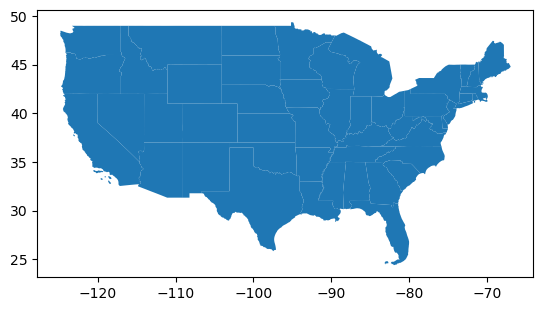

In [14]:
#limit the map to the contiguous US
state = state.cx[-125:-66, 25:50]
state.plot()

In [16]:
#get total bounds of the 
print (state.total_bounds)

[-124.848974   24.396308  -66.885444   49.384479]


In [19]:
#get the centroid of each state
state['centroid'] = state.centroid
#change centroid to two columns centroid_lat and centroid_lon
state['c_lat'] = state['centroid'].apply(lambda x: x.y)
state['c_lon'] = state['centroid'].apply(lambda x: x.x)
state.head()

/var/folders/zm/x5dzdlrs5mlbxrm7z5g6p05r0000gn/T/ipykernel_23304/3892722596.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  state['centroid'] = state.centroid


,GEOID,state_name,geometry,ppl_density,walk_to_work_percent,centroid,c_lat,c_lon
0,54,West Virginia,"POLYGON ((-77.75438 39.33346, -77.75422 39.333...",74.57889,0.025922,POINT (-80.61371 38.64257),38.642567,-80.613707
1,12,Florida,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ...",403.22420,0.013520,POINT (-82.54411 28.42369),28.423686,-82.544110
2,17,Illinois,"POLYGON ((-87.89243 38.28285, -87.89334 38.282...",229.81260,0.026866,POINT (-89.14863 40.12420),40.124202,-89.148634
3,27,Minnesota,"POLYGON ((-95.31991 48.99892, -95.31778 48.998...",71.52052,0.025974,POINT (-94.19831 46.34937),46.349372,-94.198314
4,24,Maryland,"POLYGON ((-75.75600 39.24607, -75.75579 39.243...",634.49790,0.019189,POINT (-76.68718 38.94649),38.946494,-76.687177


/var/folders/zm/x5dzdlrs5mlbxrm7z5g6p05r0000gn/T/ipykernel_23304/812696224.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  state.centroid.plot(ax = state.plot(), color = 'red')


<Axes: >

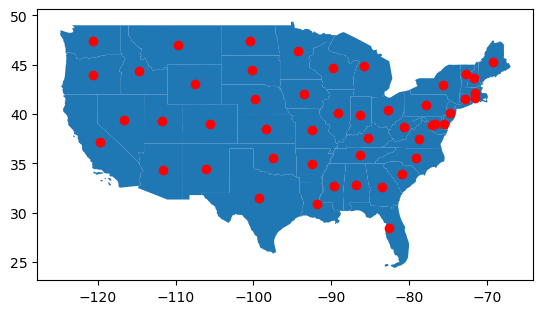

In [21]:
#plot state then overlay the centroid
state.centroid.plot(ax = state.plot(), color = 'red')


In [23]:
# change the column order to have geometry at the end
state = state[['GEOID', 'state_name', 'ppl_density', 'walk_to_work_percent', 'c_lat', 'c_lon', 'geometry']]
state.head()

,GEOID,state_name,ppl_density,walk_to_work_percent,c_lat,c_lon,geometry
0,54,West Virginia,74.57889,0.025922,38.642567,-80.613707,"POLYGON ((-77.75438 39.33346, -77.75422 39.333..."
1,12,Florida,403.22420,0.013520,28.423686,-82.544110,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ..."
2,17,Illinois,229.81260,0.026866,40.124202,-89.148634,"POLYGON ((-87.89243 38.28285, -87.89334 38.282..."
3,27,Minnesota,71.52052,0.025974,46.349372,-94.198314,"POLYGON ((-95.31991 48.99892, -95.31778 48.998..."
4,24,Maryland,634.49790,0.019189,38.946494,-76.687177,"POLYGON ((-75.75600 39.24607, -75.75579 39.243..."


In [24]:
#export to shapefile
state.to_file('../data/processed/00_state/state.shp')

/var/folders/zm/x5dzdlrs5mlbxrm7z5g6p05r0000gn/T/ipykernel_23304/2838198620.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  state.to_file('../data/processed/00_state/state.shp')


# County

In [25]:
# ready county data
county_geo = gpd.read_file('../data/shapefiles/tl_2023_us_county/tl_2023_us_county.shp')
#select columns GEOID, geometry
county_geo = county_geo[['GEOID', 'geometry']]
#convert GEOID10 to int
county_geo['GEOID'] = county_geo['GEOID'].astype(int)
county_geo

,GEOID,geometry
0,31039,"POLYGON ((-96.55515 41.91587, -96.55515 41.914..."
1,53069,"POLYGON ((-123.72755 46.26449, -123.72755 46.2..."
2,35011,"POLYGON ((-104.89337 34.08894, -104.89337 34.0..."
3,31109,"POLYGON ((-96.68493 40.52330, -96.69219 40.523..."
4,31129,"POLYGON ((-98.27370 40.11840, -98.27374 40.122..."
...,...,...
3230,13123,"POLYGON ((-84.30237 34.57832, -84.30329 34.577..."
3231,27135,"POLYGON ((-95.25857 48.88666, -95.25707 48.885..."
3232,28089,"POLYGON ((-90.14883 32.40026, -90.14890 32.400..."
3233,48227,"POLYGON ((-101.18138 32.21252, -101.18138 32.2..."


In [29]:
# read in population data per county
county_pop = pd.read_csv('../data/csv/ACS2022-county-ppl.csv')
#only get GEOID and SE_A01001_002
county_pop = county_pop[['Geo_FIPS', 'SE_A00002_002']]
#change name to GEOID and ppl_density
county_pop = county_pop.rename(columns = {'Geo_FIPS':'GEOID', 'SE_A00002_002':'ppl_density'})
county_pop

,GEOID,ppl_density
0,1001,98.84851
1,1003,146.81770
2,1005,28.10935
3,1007,35.74633
4,1009,91.60778
...,...,...
3217,72145,1181.76900
3218,72147,161.43440
3219,72149,616.89250
3220,72151,549.00320


In [27]:
#read in walk to work data per county
county_walk = pd.read_csv('../data/csv/ACS2022-county-walk-to-work.csv')
#only get GEOID and SE_A09005_001,SE_A09005_006
county_walk = county_walk[['Geo_FIPS', 'SE_A09005_001','SE_A09005_006']]
#change name to GEOID, working_ppl, walk_to_work_ppl
county_walk = county_walk.rename(columns = {'Geo_FIPS':'GEOID', 'SE_A09005_001':'working_ppl', 'SE_A09005_006':'walk_to_work_ppl'})
#create a new column walk_to_work_percent
county_walk['walk_to_work_percent'] = county_walk['walk_to_work_ppl']/county_walk['working_ppl']
county_walk = county_walk[['GEOID', 'walk_to_work_percent']]
county_walk.head()

,GEOID,walk_to_work_percent
0,1001,0.004846
1,1003,0.012081
2,1005,0.024457
3,1007,0.007316
4,1009,0.008811


In [30]:
#merge county_geo and county_pop
county = county_geo.merge(county_pop, on='GEOID')
#merge county and county_walk
county = county.merge(county_walk, on='GEOID')
county

,GEOID,geometry,ppl_density,walk_to_work_percent
0,31039,"POLYGON ((-96.55515 41.91587, -96.55515 41.914...",15.775040,0.017324
1,53069,"POLYGON ((-123.72755 46.26449, -123.72755 46.2...",17.023660,0.041935
2,35011,"POLYGON ((-104.89337 34.08894, -104.89337 34.0...",0.729626,0.056787
3,31109,"POLYGON ((-96.68493 40.52330, -96.69219 40.523...",384.524800,0.030294
4,31129,"POLYGON ((-98.27370 40.11840, -98.27374 40.122...",7.114601,0.045455
...,...,...,...,...
3217,13123,"POLYGON ((-84.30237 34.57832, -84.30329 34.577...",73.950830,0.008928
3218,27135,"POLYGON ((-95.25857 48.88666, -95.25707 48.885...",9.148537,0.025258
3219,28089,"POLYGON ((-90.14883 32.40026, -90.14890 32.400...",152.944400,0.005686
3220,48227,"POLYGON ((-101.18138 32.21252, -101.18138 32.2...",38.286330,0.010094


In [31]:
#limit the map to the contiguous US
county = county.cx[-125:-66, 25:50]

In [32]:
#limit to only the west coast
county = county.cx[-125:-100, 30:50]

<Axes: >

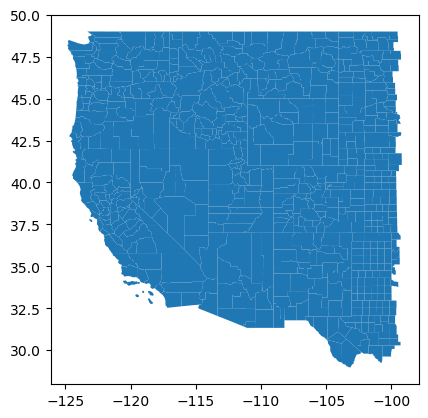

In [33]:
county.plot()

In [34]:
#get the centroid of each county
county['centroid'] = county.centroid
#change centroid to two columns centroid_lat and centroid_lon
county['c_lat'] = county['centroid'].apply(lambda x: x.y)
county['c_lon'] = county['centroid'].apply(lambda x: x.x)
#drop the centroid column
county = county.drop(columns=['centroid'])
county.head()

/var/folders/zm/x5dzdlrs5mlbxrm7z5g6p05r0000gn/T/ipykernel_23304/1849564452.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  county['centroid'] = county.centroid


,GEOID,geometry,ppl_density,walk_to_work_percent,c_lat,c_lon
1,53069,"POLYGON ((-123.72755 46.26449, -123.72755 46.2...",17.023660,0.041935,46.291134,-123.433470
2,35011,"POLYGON ((-104.89337 34.08894, -104.89337 34.0...",0.729626,0.056787,34.342414,-104.411958
7,48327,"POLYGON ((-99.77120 30.71079, -99.78240 30.710...",2.177319,0.011923,30.889782,-99.820636
8,6091,"POLYGON ((-120.55587 39.50874, -120.55614 39.5...",3.059271,0.004934,39.580400,-120.515996
11,48189,"POLYGON ((-102.09041 34.31313, -102.08890 34.3...",32.373490,0.014935,34.070513,-101.826881


In [18]:
# county.explore( column = 'ppl_density', cmap = 'OrRd', tiles ='cartodbpositron', scheme = 'quantiles', k=10)

In [35]:
#change the column order to have geometry at the end
county = county[['GEOID', 'ppl_density','walk_to_work_percent', 'c_lat', 'c_lon', 'geometry']]
county.head()

,GEOID,ppl_density,walk_to_work_percent,c_lat,c_lon,geometry
1,53069,17.023660,0.041935,46.291134,-123.433470,"POLYGON ((-123.72755 46.26449, -123.72755 46.2..."
2,35011,0.729626,0.056787,34.342414,-104.411958,"POLYGON ((-104.89337 34.08894, -104.89337 34.0..."
7,48327,2.177319,0.011923,30.889782,-99.820636,"POLYGON ((-99.77120 30.71079, -99.78240 30.710..."
8,6091,3.059271,0.004934,39.580400,-120.515996,"POLYGON ((-120.55587 39.50874, -120.55614 39.5..."
11,48189,32.373490,0.014935,34.070513,-101.826881,"POLYGON ((-102.09041 34.31313, -102.08890 34.3..."


In [37]:
#export to shapefile
county.to_file('../data/processed/01_county/w_county.shp')

/var/folders/zm/x5dzdlrs5mlbxrm7z5g6p05r0000gn/T/ipykernel_23304/4024701723.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  county.to_file('../data/processed/01_county/w_county.shp')


# Tract

This is the census tract for Washington State only

In [38]:
# read in tract data
tract_geo = gpd.read_file('../data/shapefiles/tl_2023_53_tract/tl_2023_53_tract.shp')
#keep only GEOID and geometry
tract_geo = tract_geo[['GEOID', 'geometry']]
#convert GEOID10 to int
tract_geo['GEOID'] = tract_geo['GEOID'].astype(int)
tract_geo

,GEOID,geometry
0,53011041107,"POLYGON ((-122.59940 45.67149, -122.59939 45.6..."
1,53061042006,"POLYGON ((-122.31235 47.89200, -122.31234 47.8..."
2,53061050102,"POLYGON ((-122.30367 47.85577, -122.30367 47.8..."
3,53053073122,"POLYGON ((-122.29350 47.09960, -122.29350 47.1..."
4,53061050600,"POLYGON ((-122.40094 47.78211, -122.40063 47.7..."
...,...,...
1779,53033023701,"POLYGON ((-122.19628 47.64014, -122.19628 47.6..."
1780,53033007102,"POLYGON ((-122.37179 47.62823, -122.37109 47.6..."
1781,53033007405,"POLYGON ((-122.32680 47.61709, -122.32626 47.6..."
1782,53033023808,"POLYGON ((-122.19889 47.61384, -122.19835 47.6..."


In [39]:
#read in population data per tract
tract_pop = pd.read_csv('../data/csv/ACS2022-wa-tract-ppl.csv')
#only get GEOID and SE_A01001_002
tract_pop = tract_pop[['Geo_FIPS', 'SE_A00002_002']]
#change name to GEOID and ppl_density
tract_pop = tract_pop.rename(columns = {'Geo_FIPS':'GEOID', 'SE_A00002_002':'ppl_density'})
tract_pop

,GEOID,ppl_density
0,53001950100,3.944901
1,53001950200,2.333721
2,53001950301,10.007000
3,53001950302,40.353790
4,53001950303,61.709050
...,...,...
1779,53077940003,3.832850
1780,53077940005,2438.063000
1781,53077940006,2700.322000
1782,53077940007,1800.856000


In [40]:
# read in walk to work data per tract
tract_walk = pd.read_csv('../data/csv/ACS2022-wa-tract-walk-to-work.csv')
#only get GEOID and SE_A09005_001,SE_A09005_006
tract_walk = tract_walk[['Geo_FIPS', 'SE_A09005_001','SE_A09005_006']]
#change name to GEOID, working_ppl, walk_to_work_ppl
tract_walk = tract_walk.rename(columns = {'Geo_FIPS':'GEOID', 'SE_A09005_001':'working_ppl', 'SE_A09005_006':'walk_to_work_ppl'})
#create a new column walk_to_work_percent
tract_walk['walk_to_work_percent'] = tract_walk['walk_to_work_ppl']/tract_walk['working_ppl']
tract_walk = tract_walk[['GEOID', 'walk_to_work_percent']]
tract_walk.head()

,GEOID,walk_to_work_percent
0,53001950100,0.071076
1,53001950200,0.050286
2,53001950301,0.000000
3,53001950302,0.026622
4,53001950303,0.000000


In [43]:
#merge tract_geo and tract_pop
tract = tract_geo.merge(tract_pop, on='GEOID')
#merge tract and tract_walk
tract = tract.merge(tract_walk, on='GEOID')
#delete rows with NaN
tract = tract.dropna()
tract

,GEOID,geometry,ppl_density,walk_to_work_percent
0,53011041107,"POLYGON ((-122.59940 45.67149, -122.59939 45.6...",4012.327,0.024864
1,53061042006,"POLYGON ((-122.31235 47.89200, -122.31234 47.8...",5131.206,0.013894
2,53061050102,"POLYGON ((-122.30367 47.85577, -122.30367 47.8...",9097.557,0.005878
3,53053073122,"POLYGON ((-122.29350 47.09960, -122.29350 47.1...",2913.104,0.002346
4,53061050600,"POLYGON ((-122.40094 47.78211, -122.40063 47.7...",894.329,0.014085
...,...,...,...,...
1779,53033023701,"POLYGON ((-122.19628 47.64014, -122.19628 47.6...",2764.991,0.009357
1780,53033007102,"POLYGON ((-122.37179 47.62823, -122.37109 47.6...",19661.540,0.085899
1781,53033007405,"POLYGON ((-122.32680 47.61709, -122.32626 47.6...",50648.480,0.331316
1782,53033023808,"POLYGON ((-122.19889 47.61384, -122.19835 47.6...",22230.720,0.188955


In [44]:
#add centroid
tract['centroid'] = tract.centroid
#change centroid to two columns centroid_lat and centroid_lon
tract['c_lat'] = tract['centroid'].apply(lambda x: x.y)
tract['c_lon'] = tract['centroid'].apply(lambda x: x.x)
#drop the centroid column
tract = tract.drop(columns=['centroid'])
tract.head()

/var/folders/zm/x5dzdlrs5mlbxrm7z5g6p05r0000gn/T/ipykernel_23304/1834419817.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  tract['centroid'] = tract.centroid


,GEOID,geometry,ppl_density,walk_to_work_percent,c_lat,c_lon
0,53011041107,"POLYGON ((-122.59940 45.67149, -122.59939 45.6...",4012.327,0.024864,45.671415,-122.591199
1,53061042006,"POLYGON ((-122.31235 47.89200, -122.31234 47.8...",5131.206,0.013894,47.894107,-122.298926
2,53061050102,"POLYGON ((-122.30367 47.85577, -122.30367 47.8...",9097.557,0.005878,47.858122,-122.295590
3,53053073122,"POLYGON ((-122.29350 47.09960, -122.29350 47.1...",2913.104,0.002346,47.105786,-122.274169
4,53061050600,"POLYGON ((-122.40094 47.78211, -122.40063 47.7...",894.329,0.014085,47.789751,-122.388138


In [19]:
# tract.explore( column = 'ppl_density', cmap = 'OrRd', tiles ='cartodbpositron', scheme = 'naturalbreaks', k=10)

In [61]:
#export to shapefile
tract.to_file('../data/processed/02_tract/wa/wa_tract.shp')

/var/folders/zm/x5dzdlrs5mlbxrm7z5g6p05r0000gn/T/ipykernel_23304/2409935801.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  tract.to_file('../data/processed/02_tract/wa/wa_tract.shp')


# DuckDB

In [49]:
#connect to duckdb
con = duckdb.connect(database='../data/my_spatial_db.duckdb', read_only=False)

In [50]:
#install the spatial extension
con.install_extension("spatial")
con.load_extension("spatial")

In [53]:
#read the shapefile into duckdb
con.sql("SELECT * FROM ST_Read('../data/processed/00_state/state.shp')")

┌───────┬──────────────────────┬────────────┬───┬────────────────────┬─────────────────────┬──────────────────────┐
│ GEOID │      state_name      │ ppl_densit │ … │       c_lat        │        c_lon        │         geom         │
│ int64 │       varchar        │   double   │   │       double       │       double        │       geometry       │
├───────┼──────────────────────┼────────────┼───┼────────────────────┼─────────────────────┼──────────────────────┤
│    54 │ West Virginia        │   74.57889 │ … │  38.64256702547588 │  -80.61370690006795 │ POLYGON ((-77.7543…  │
│    12 │ Florida              │   403.2242 │ … │  28.42368639073475 │  -82.54411004542992 │ MULTIPOLYGON (((-8…  │
│    17 │ Illinois             │   229.8126 │ … │ 40.124201506973534 │  -89.14863407346263 │ POLYGON ((-87.8924…  │
│    27 │ Minnesota            │   71.52052 │ … │  46.34937236561852 │  -94.19831440684607 │ POLYGON ((-95.3199…  │
│    24 │ Maryland             │   634.4979 │ … │  38.94649395981202 │  

In [ ]:
# con.execute("DROP TABLE state_ppl_density")

In [54]:
#create a table for the state shapefile
con.sql("CREATE TABLE state AS SELECT * FROM ST_Read('../data/processed/00_state/state.shp')")

In [55]:
#check if the table was created
con.table('state')

┌───────┬──────────────────────┬────────────┬───┬────────────────────┬─────────────────────┬──────────────────────┐
│ GEOID │      state_name      │ ppl_densit │ … │       c_lat        │        c_lon        │         geom         │
│ int64 │       varchar        │   double   │   │       double       │       double        │       geometry       │
├───────┼──────────────────────┼────────────┼───┼────────────────────┼─────────────────────┼──────────────────────┤
│    54 │ West Virginia        │   74.57889 │ … │  38.64256702547588 │  -80.61370690006795 │ POLYGON ((-77.7543…  │
│    12 │ Florida              │   403.2242 │ … │  28.42368639073475 │  -82.54411004542992 │ MULTIPOLYGON (((-8…  │
│    17 │ Illinois             │   229.8126 │ … │ 40.124201506973534 │  -89.14863407346263 │ POLYGON ((-87.8924…  │
│    27 │ Minnesota            │   71.52052 │ … │  46.34937236561852 │  -94.19831440684607 │ POLYGON ((-95.3199…  │
│    24 │ Maryland             │   634.4979 │ … │  38.94649395981202 │  

In [57]:
#repeat for count level
con.sql("SELECT * FROM ST_Read('../data/processed/01_county/w_county.shp')")

┌───────┬────────────┬───────────────────┬────────────────────┬─────────────────────┬──────────────────────────────────┐
│ GEOID │ ppl_densit │    walk_to_wo     │       c_lat        │        c_lon        │               geom               │
│ int64 │   double   │      double       │       double       │       double        │             geometry             │
├───────┼────────────┼───────────────────┼────────────────────┼─────────────────────┼──────────────────────────────────┤
│ 53069 │   17.02366 │ 0.041935483870968 │  46.29113381398991 │ -123.43346991362195 │ POLYGON ((-123.727552 46.26449…  │
│ 35011 │  0.7296263 │ 0.056786703601108 │   34.3424135117032 │ -104.41195788796516 │ POLYGON ((-104.893374 34.08894…  │
│ 48327 │   2.177319 │ 0.011922503725782 │ 30.889782006927966 │  -99.82063586132584 │ POLYGON ((-99.771199 30.710793…  │
│  6091 │   3.059271 │ 0.004934210526316 │  39.58040010145207 │ -120.51599637865922 │ POLYGON ((-120.555867 39.50873…  │
│ 48189 │   32.37349 │ 0.0149353

In [58]:
# con.execute("DROP TABLE county_ppl_density")

In [59]:
#create a table for the county shapefile
con.sql("CREATE TABLE county AS SELECT * FROM ST_Read('../data/processed/01_county/w_county.shp')")
#check if the table was created
con.table('county')

┌───────┬────────────┬───────────────────┬────────────────────┬─────────────────────┬──────────────────────────────────┐
│ GEOID │ ppl_densit │    walk_to_wo     │       c_lat        │        c_lon        │               geom               │
│ int64 │   double   │      double       │       double       │       double        │             geometry             │
├───────┼────────────┼───────────────────┼────────────────────┼─────────────────────┼──────────────────────────────────┤
│ 53069 │   17.02366 │ 0.041935483870968 │  46.29113381398991 │ -123.43346991362195 │ POLYGON ((-123.727552 46.26449…  │
│ 35011 │  0.7296263 │ 0.056786703601108 │   34.3424135117032 │ -104.41195788796516 │ POLYGON ((-104.893374 34.08894…  │
│ 48327 │   2.177319 │ 0.011922503725782 │ 30.889782006927966 │  -99.82063586132584 │ POLYGON ((-99.771199 30.710793…  │
│  6091 │   3.059271 │ 0.004934210526316 │  39.58040010145207 │ -120.51599637865922 │ POLYGON ((-120.555867 39.50873…  │
│ 48189 │   32.37349 │ 0.0149353

In [60]:
#create a table for the county shapefile
con.sql("CREATE TABLE w_county AS SELECT * FROM ST_Read('../data/processed/01_county/w_county.shp')")
#check if the table was created
con.table('w_county')

┌───────┬────────────┬───────────────────┬────────────────────┬─────────────────────┬──────────────────────────────────┐
│ GEOID │ ppl_densit │    walk_to_wo     │       c_lat        │        c_lon        │               geom               │
│ int64 │   double   │      double       │       double       │       double        │             geometry             │
├───────┼────────────┼───────────────────┼────────────────────┼─────────────────────┼──────────────────────────────────┤
│ 53069 │   17.02366 │ 0.041935483870968 │  46.29113381398991 │ -123.43346991362195 │ POLYGON ((-123.727552 46.26449…  │
│ 35011 │  0.7296263 │ 0.056786703601108 │   34.3424135117032 │ -104.41195788796516 │ POLYGON ((-104.893374 34.08894…  │
│ 48327 │   2.177319 │ 0.011922503725782 │ 30.889782006927966 │  -99.82063586132584 │ POLYGON ((-99.771199 30.710793…  │
│  6091 │   3.059271 │ 0.004934210526316 │  39.58040010145207 │ -120.51599637865922 │ POLYGON ((-120.555867 39.50873…  │
│ 48189 │   32.37349 │ 0.0149353

In [62]:
#repeat for tract level
con.sql("SELECT * FROM ST_Read('../data/processed/02_tract/wa/wa_tract.shp')")

┌─────────────┬────────────┬───────────────────┬────────────────────┬─────────────────────┬────────────────────────────┐
│    GEOID    │ ppl_densit │    walk_to_wo     │       c_lat        │        c_lon        │            geom            │
│    int64    │   double   │      double       │       double       │       double        │          geometry          │
├─────────────┼────────────┼───────────────────┼────────────────────┼─────────────────────┼────────────────────────────┤
│ 53011041107 │   4012.327 │  0.02486355366889 │  45.67141464770872 │  -122.5911993910792 │ POLYGON ((-122.5994 45.6…  │
│ 53061042006 │   5131.206 │ 0.013893967093236 │ 47.894106991516075 │ -122.29892591674952 │ POLYGON ((-122.312352 47…  │
│ 53061050102 │   9097.557 │ 0.005877638258082 │ 47.858122219251115 │ -122.29559033541183 │ POLYGON ((-122.303668 47…  │
│ 53053073122 │   2913.104 │ 0.002346499804458 │  47.10578642017224 │ -122.27416909802538 │ POLYGON ((-122.293503 47…  │
│ 53061050600 │    894.329 │ 0.0

In [63]:
# create a table for the tract shapefile
con.sql("CREATE TABLE wa_tract AS SELECT * FROM ST_Read('../data/processed/02_tract/wa/wa_tract.shp')")
# check if the table was created
con.table('wa_tract')


┌─────────────┬────────────┬───────────────────┬────────────────────┬─────────────────────┬────────────────────────────┐
│    GEOID    │ ppl_densit │    walk_to_wo     │       c_lat        │        c_lon        │            geom            │
│    int64    │   double   │      double       │       double       │       double        │          geometry          │
├─────────────┼────────────┼───────────────────┼────────────────────┼─────────────────────┼────────────────────────────┤
│ 53011041107 │   4012.327 │  0.02486355366889 │  45.67141464770872 │  -122.5911993910792 │ POLYGON ((-122.5994 45.6…  │
│ 53061042006 │   5131.206 │ 0.013893967093236 │ 47.894106991516075 │ -122.29892591674952 │ POLYGON ((-122.312352 47…  │
│ 53061050102 │   9097.557 │ 0.005877638258082 │ 47.858122219251115 │ -122.29559033541183 │ POLYGON ((-122.303668 47…  │
│ 53053073122 │   2913.104 │ 0.002346499804458 │  47.10578642017224 │ -122.27416909802538 │ POLYGON ((-122.293503 47…  │
│ 53061050600 │    894.329 │ 0.0

In [64]:
con.close()